# Automatic glucose measurement (Register level 0)

In [18]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

raw_data = pd.read_csv("sample.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=["Hora"], date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
auto_gluc = raw_data[raw_data[raw_data.columns[1]] == 0].drop(raw_data.columns[[1, 3, 4, 5, 6, 7]], axis=1)
day = datetime.datetime(2016, 4, 1)
auto_gluc[auto_gluc["Hora"].dt.date == day.date()]

,Hora,Histórico glucosa (mg/dL)
ID,,
37240,2016-04-01 00:01:00,82
37241,2016-04-01 00:16:00,84
37242,2016-04-01 00:31:00,95
37243,2016-04-01 00:46:00,96
37244,2016-04-01 01:01:00,96
37262,2016-04-01 01:18:00,113
37263,2016-04-01 01:33:00,141
37264,2016-04-01 01:48:00,156
37265,2016-04-01 02:03:00,148


<IPython.core.display.Javascript object>


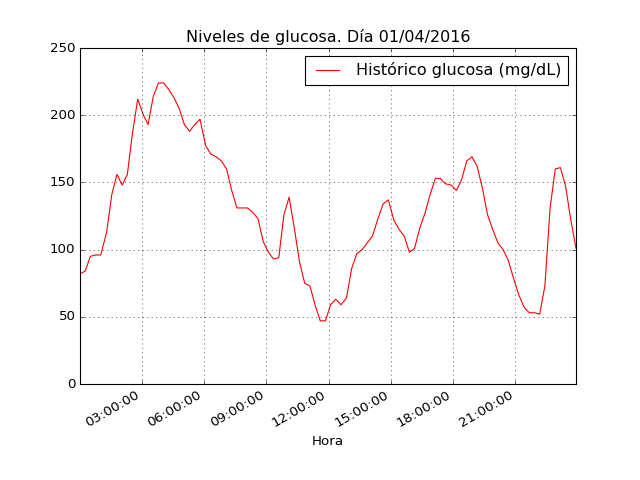

In [19]:
filtered_auto_gluc = auto_gluc[auto_gluc["Hora"].dt.date == day.date()]
filtered_auto_gluc.plot(x="Hora", y="Histórico glucosa (mg/dL)", grid=True, title= "Niveles de glucosa. Día 01/04/2016",
                        legend=True, colormap="autumn")

##Smoothing plots

<IPython.core.display.Javascript object>


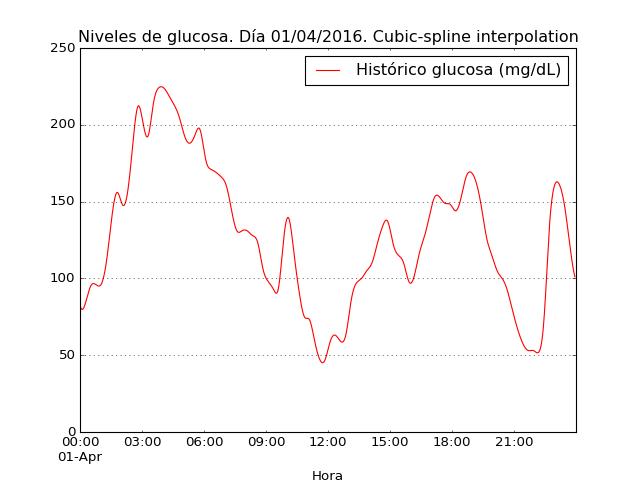

In [20]:
interval_min = 1
filtered_auto_gluc_smoothed = pd.DataFrame((day + datetime.timedelta(minutes=x * interval_min)
                                            for x in range(0, int(24 * 60 / interval_min))),
                                           columns=["Hora"])

filtered_auto_gluc_smoothed = pd.merge(filtered_auto_gluc_smoothed, filtered_auto_gluc,
                                       how='left', on="Hora")
filtered_auto_gluc_smoothed["Histórico glucosa (mg/dL)"] \
    = filtered_auto_gluc_smoothed["Histórico glucosa (mg/dL)"].interpolate(method='cubic')
filtered_auto_gluc_smoothed.plot(x="Hora", y="Histórico glucosa (mg/dL)", grid=True,
                                 title="Niveles de glucosa. Día 01/04/2016. Cubic-spline interpolation",
                                 legend=True, colormap="autumn")

# Creating 4-hour blocks using carbohydrates (register type 5)

In [21]:
time_interval = 4
carbo_data = raw_data[raw_data[raw_data.columns[1]] == 5].drop(raw_data.columns[[1, 2, 3, 4, 5]], axis=1)
carbo_datetimes = carbo_data.drop(raw_data.columns[[6, 7]], axis=1)
dates = carbo_datetimes ["Hora"].dt.date.unique()
for date in dates:
    print(date.strftime("%Y-%m-%d"))

2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09
2016-04-10
2016-04-11
2016-04-12
2016-04-13


In [22]:
#Block 0 corresponds to all registers that belongs to no block
auto_gluc.loc[:,"Block"] = 0
for date_i in  dates:
    carbo_day = carbo_datetimes [carbo_data["Hora"].dt.date == date_i]
    block_idx = 1
    for mid_block in carbo_day["Hora"]:
        block_time_window = pd.Series((mid_block - datetime.timedelta(hours=int(time_interval/2))
                                       + datetime.timedelta(minutes=x * interval_min) 
                                       for x in range(0, int(time_interval*60))))
        auto_gluc.loc[auto_gluc["Hora"].isin(block_time_window), "Block"] = block_idx
        block_idx += 1
auto_gluc_sample = auto_gluc[auto_gluc["Hora"].dt.date == day.date()]
print(auto_gluc_sample)

                     Hora  Histórico glucosa (mg/dL)  Block
ID                                                         
37240 2016-04-01 00:01:00                         82      0
37241 2016-04-01 00:16:00                         84      0
37242 2016-04-01 00:31:00                         95      0
37243 2016-04-01 00:46:00                         96      0
37244 2016-04-01 01:01:00                         96      0
37262 2016-04-01 01:18:00                        113      0
37263 2016-04-01 01:33:00                        141      0
37264 2016-04-01 01:48:00                        156      0
37265 2016-04-01 02:03:00                        148      0
37266 2016-04-01 02:18:00                        156      0
37267 2016-04-01 02:33:00                        187      0
37268 2016-04-01 02:48:00                        212      0
37269 2016-04-01 03:03:00                        201      0
37270 2016-04-01 03:18:00                        193      0
37271 2016-04-01 03:33:00               

In [23]:
carbo_data[carbo_data["Hora"].dt.date == day.date()]

,Hora,Alimentos sin valor numérico,Carbohidratos (raciones)
ID,,,
37308,2016-04-01 08:38:00,1,NaN
37587,2016-04-01 11:21:00,1,NaN
37902,2016-04-01 15:13:00,1,NaN
38250,2016-04-01 17:59:00,1,NaN
38360,2016-04-01 20:57:00,1,NaN
38405,2016-04-01 22:11:00,1,NaN


<IPython.core.display.Javascript object>


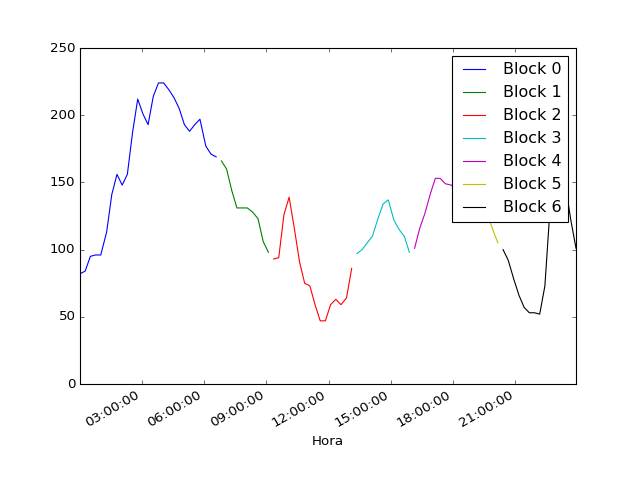

In [24]:
fig, ax = plt.subplots()
labels = []
for key, grp in auto_gluc_sample.groupby(['Block']):
    ax = grp.plot(ax=ax, kind='line', x="Hora", y="Histórico glucosa (mg/dL)")
    labels.append("Block " + str(key))
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()

## 6-hour blocks (2h + 4h) + overlapping blocks

In [25]:
pre_time_interval = 2
post_time_interval = 4
auto_gluc_blocks = raw_data[raw_data[raw_data.columns[1]] == 0].drop(raw_data.columns[[1, 3, 4, 5, 6, 7]], axis=1)

auto_gluc_blocks.loc[:, "Block"] = 0
auto_gluc_blocks.loc[:, "Day_Block"] = np.nan
auto_gluc_blocks.loc[:, "Overlapped_Block"] = False
for date_i in dates:
    carbo_day = carbo_datetimes[carbo_data["Hora"].dt.date == date_i]
    block_idx = 1
    for mid_block in carbo_day["Hora"]:
        block_time_window = pd.Series((mid_block - datetime.timedelta(hours=int(pre_time_interval))
                                       + datetime.timedelta(minutes=x * interval_min)
                                       for x in range(0, int((pre_time_interval + post_time_interval) * 60))))
        # Define block if empty
        auto_gluc_blocks.loc[
            (auto_gluc_blocks["Hora"].isin(block_time_window)) & (auto_gluc_blocks["Block"] == 0), ["Block",
                                                                                                    "Day_Block"]] \
            = [block_idx, mid_block.date()]

        # Overlapped blocks
        auto_gluc_blocks.loc[(auto_gluc_blocks["Hora"].isin(block_time_window)) & (auto_gluc_blocks["Block"] != 0)
                             & (auto_gluc_blocks["Block"] != block_idx) & (
                                 auto_gluc_blocks["Day_Block"] == mid_block.date()), "Overlapped_Block"] = True
        overlapped = auto_gluc_blocks[
            (auto_gluc_blocks["Hora"].isin(block_time_window)) & (auto_gluc_blocks["Block"] != 0)
            & (auto_gluc_blocks["Block"] != block_idx) & (auto_gluc_blocks["Day_Block"] == mid_block.date())]
        overlapped["Block"] = block_idx
        auto_gluc_blocks = auto_gluc_blocks.append(overlapped,ignore_index=True)
        block_idx += 1

auto_gluc_blocks.sort_values(by=["Hora", "Block"], inplace=True)
auto_gluc_blocks_sample = auto_gluc_blocks[(auto_gluc_blocks["Hora"].dt.date == day.date()) & (
    (auto_gluc_blocks["Hora"].dt.date == auto_gluc_blocks["Day_Block"]) | (auto_gluc_blocks["Block"] == 0))]
auto_gluc_blocks_sample

/home/franxi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Hora,Histórico glucosa (mg/dL),Block,Day_Block,Overlapped_Block
39,2016-04-01 01:33:00,141,0,NaN,False
40,2016-04-01 01:48:00,156,0,NaN,False
41,2016-04-01 02:03:00,148,0,NaN,False
42,2016-04-01 02:18:00,156,0,NaN,False
43,2016-04-01 02:33:00,187,0,NaN,False
44,2016-04-01 02:48:00,212,0,NaN,False
45,2016-04-01 03:03:00,201,0,NaN,False
46,2016-04-01 03:18:00,193,0,NaN,False
47,2016-04-01 03:33:00,214,0,NaN,False
48,2016-04-01 03:48:00,224,0,NaN,False


<IPython.core.display.Javascript object>


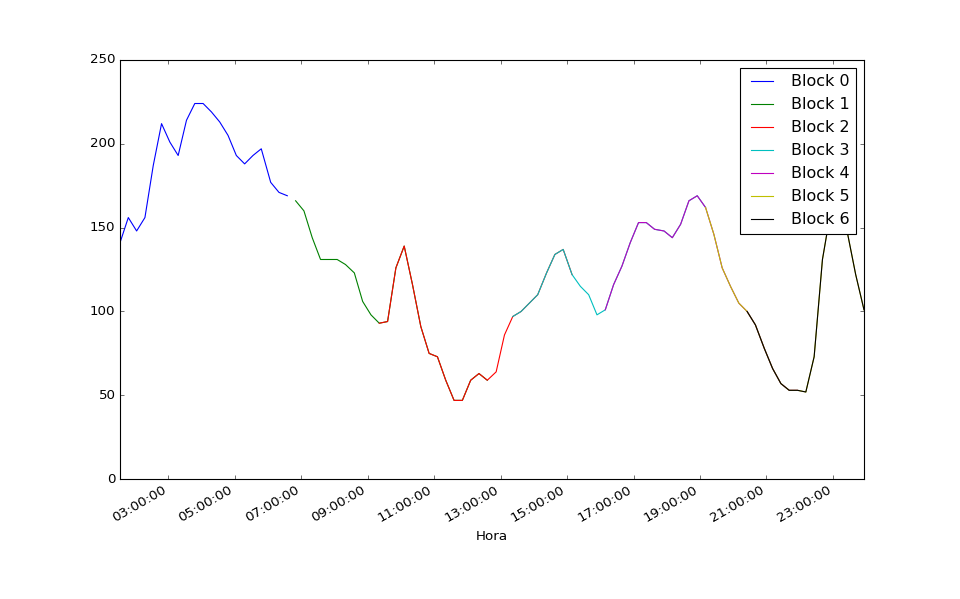

In [26]:
fig, ax = plt.subplots()
labels = []
for key, grp in auto_gluc_blocks_sample.groupby(['Block']):
    ax = grp.plot(ax=ax, kind='line', x="Hora", y="Histórico glucosa (mg/dL)")
    labels.append("Block " + str(key))
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()